In [1]:
import librosa.display, librosa

In [2]:
import IPython.display

In [3]:
import warnings

In [4]:
import numpy as np

In [5]:
warnings.simplefilter("ignore")

In [6]:
def sin_wave(amp, freq, time):
    return amp * np.sin(2*np.pi*freq*time)

In [7]:
sr = 22*1000.
ts = 1/sr

time = np.arange(0,1,ts)
DO = sin_wave(1,261.6256, time)
MI = sin_wave(1,329.6276, time)
SOL = sin_wave(1,391.9954, time)

### librosa로 음원 시간 축 그리기 

In [8]:
import matplotlib.pyplot as plt

def draw_wave(sample_sounds):
    plt.figure(figsize=(12,6))
    librosa.display.waveshow(sample_sounds, alpha = 0.2)
    plt.xlabel('time (s)'); plt.ylabel('amplitude')
    plt.title('waveform'); plt.show()

In [9]:
sample_concat = np.concatenate((DO,MI,SOL))

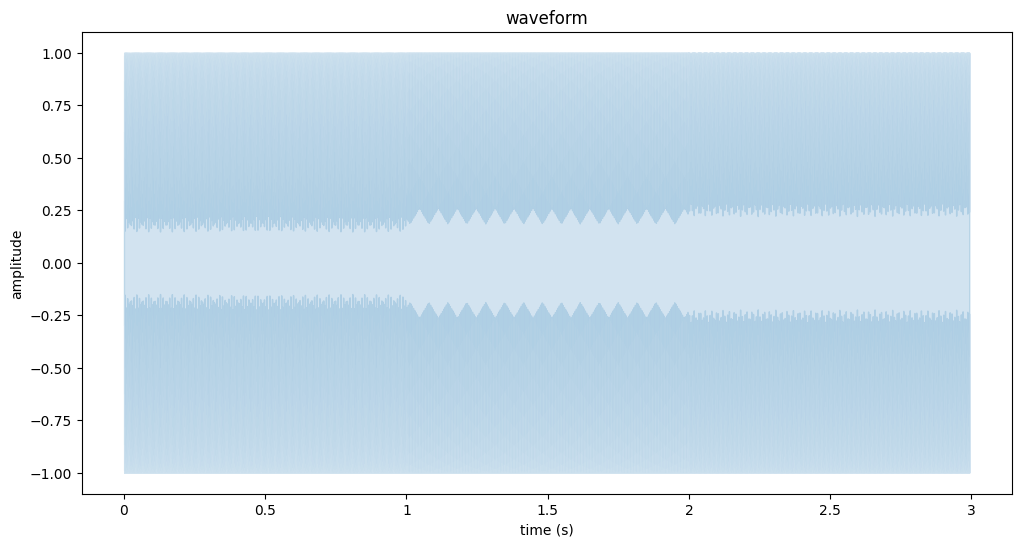

In [10]:
draw_wave(sample_concat)

In [11]:
def get_stft(sample_sounds):
    return librosa.stft(sample_sounds)

In [12]:
import numpy as np

def draw_stft(sample_sounds, ylim=(None, None)):
    plt.figure(figsize=(12,6))
    librosa.display.specshow(np.abs(get_stft(sample_sounds)), y_axis='hz', x_axis='s')
    plt.ylim(ylim); plt.grid(); plt.show()

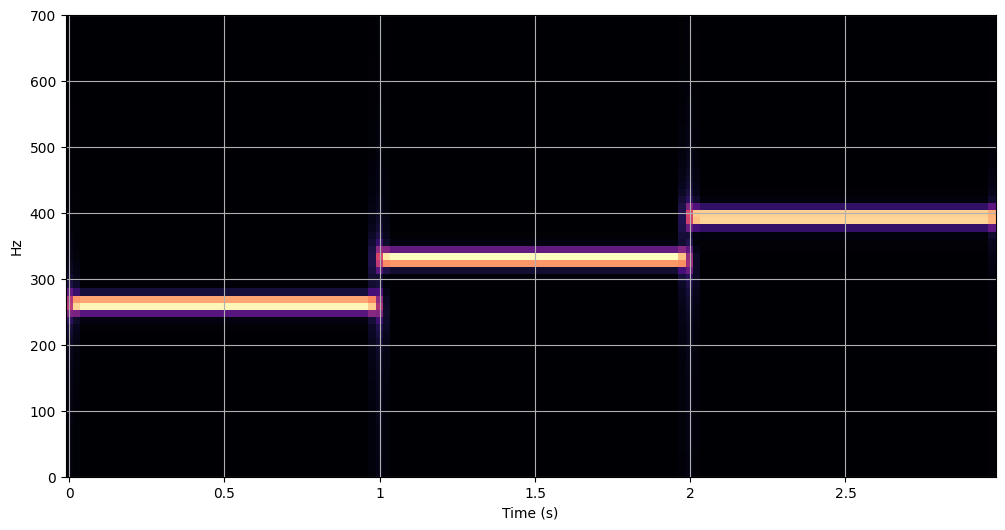

In [13]:
draw_stft(sample_concat, ylim=(0,700))

## chroma는 주파수 분석 결과를 12화음에 맞춰 볼 수 있도록 함 
* 내림하는 방식으로 12화음에 맞춰 분석 함 

In [14]:
def get_chroma(sample_sounds, sr):
    return librosa.feature.chroma_stft(S=np.abs(get_stft(sample_sounds)), sr= sr)


In [15]:
def draw_chroma(sample_sounds, sr):
    plt.figure(figsize=(12,6))
    librosa.display.specshow(get_chroma(sample_sounds, sr), y_axis = 'chroma', x_axis = 'time')
    plt.grid(); plt.show()

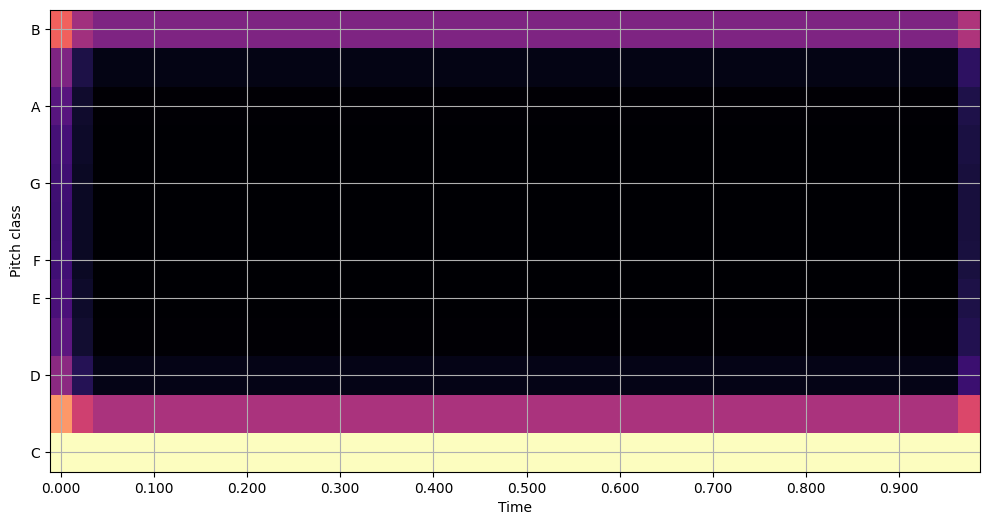

In [16]:
draw_chroma(DO,sr)

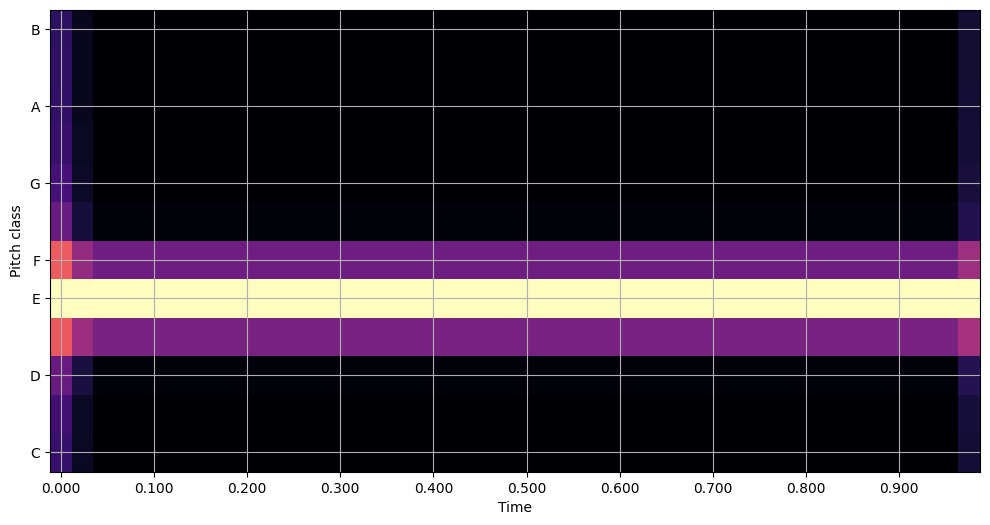

In [17]:
draw_chroma(MI,sr)

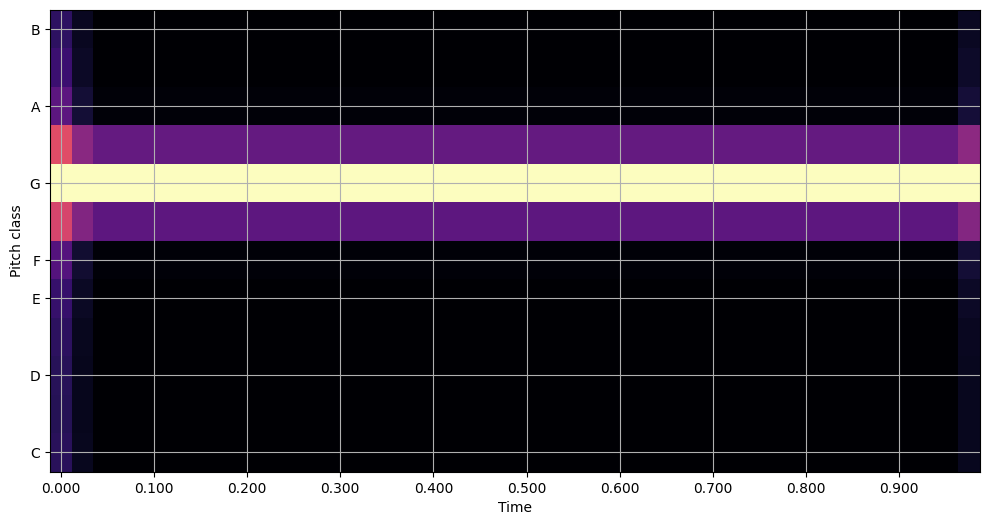

In [18]:
draw_chroma(SOL,sr)

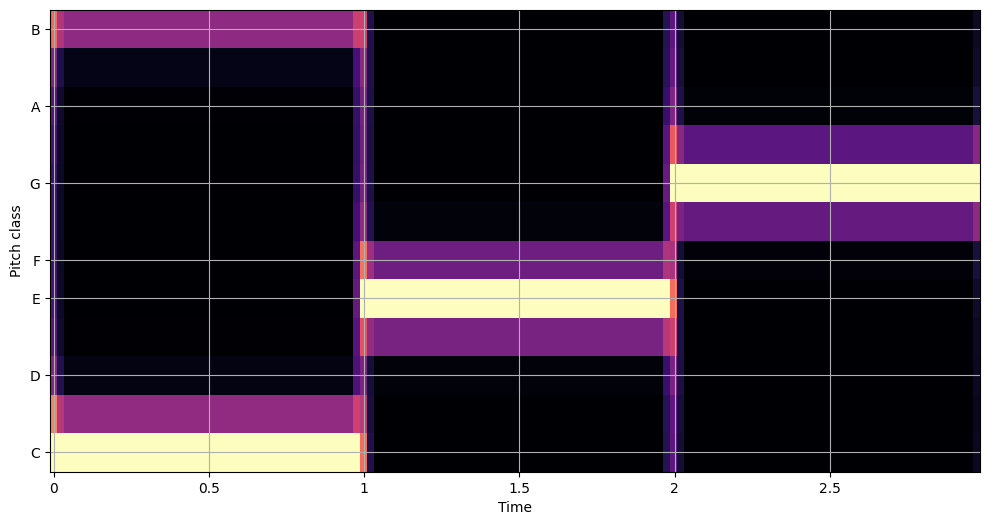

In [19]:
draw_chroma(sample_concat,sr)

In [20]:
sum_samples = sum([DO,MI,SOL])

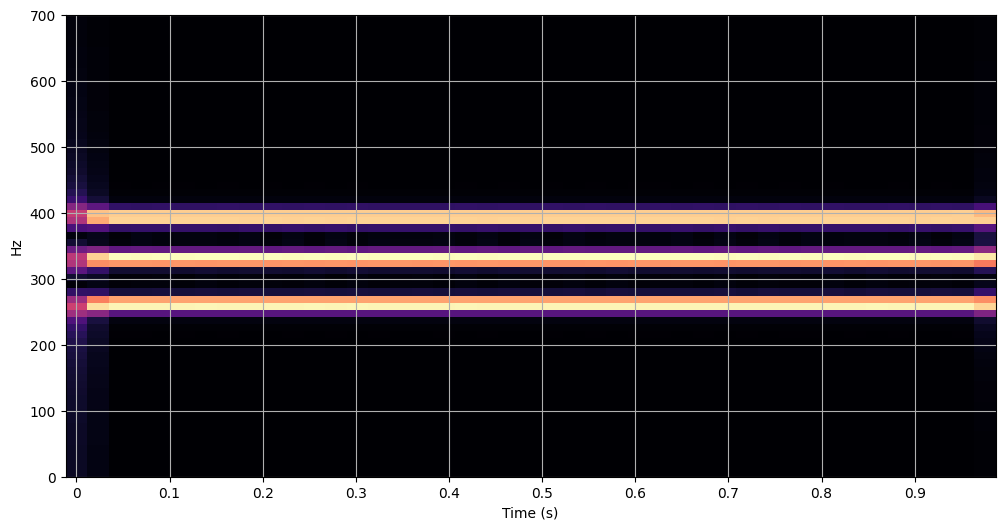

In [21]:
draw_stft(sum_samples, ylim=(0,700))

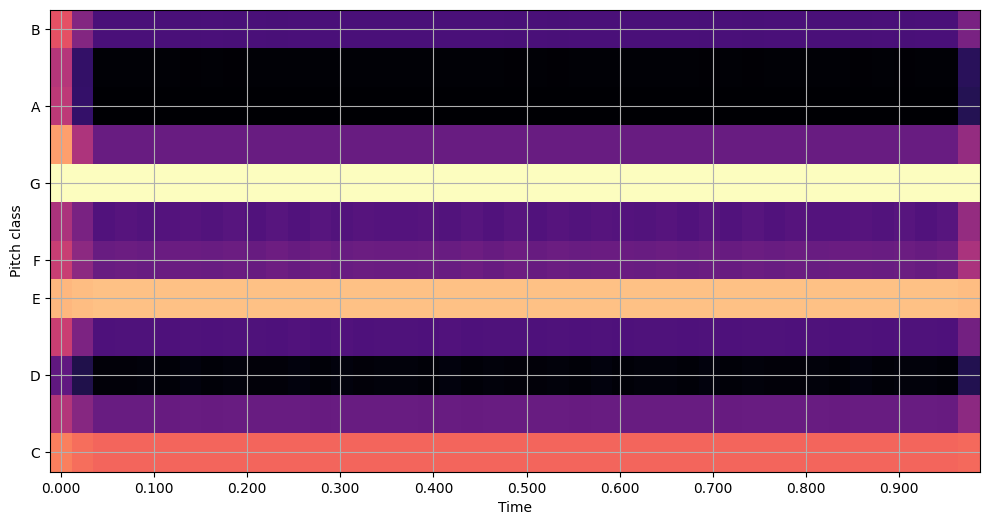

In [22]:
draw_chroma(sum_samples, sr)

In [25]:
IPython.display.Audio(data=sum_samples, rate = sr)

In [26]:
piano , sr = librosa.core.load('/home/seungsu/workspace/file/piano.wav')

In [27]:
IPython.display.Audio(data = piano, rate =sr)

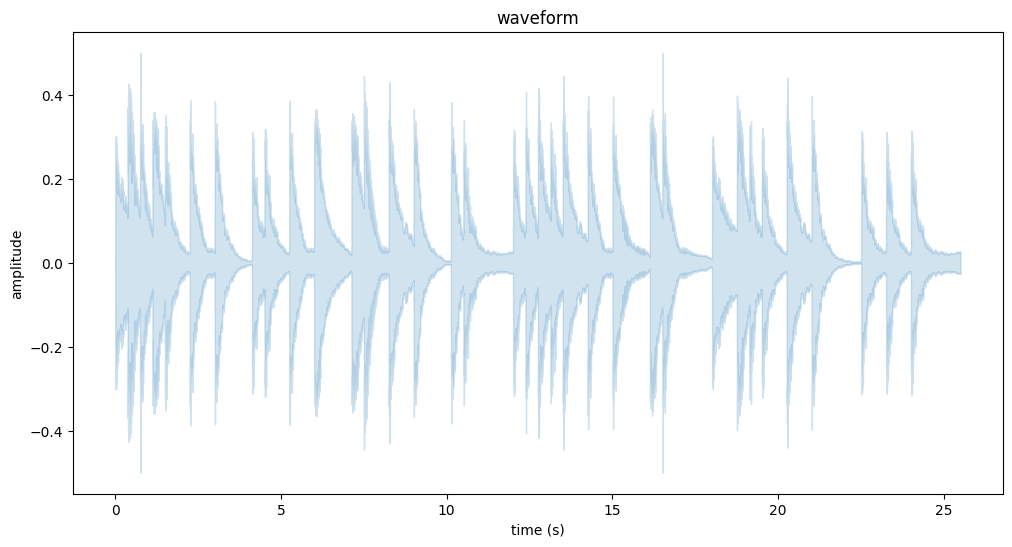

In [28]:
draw_wave(piano)

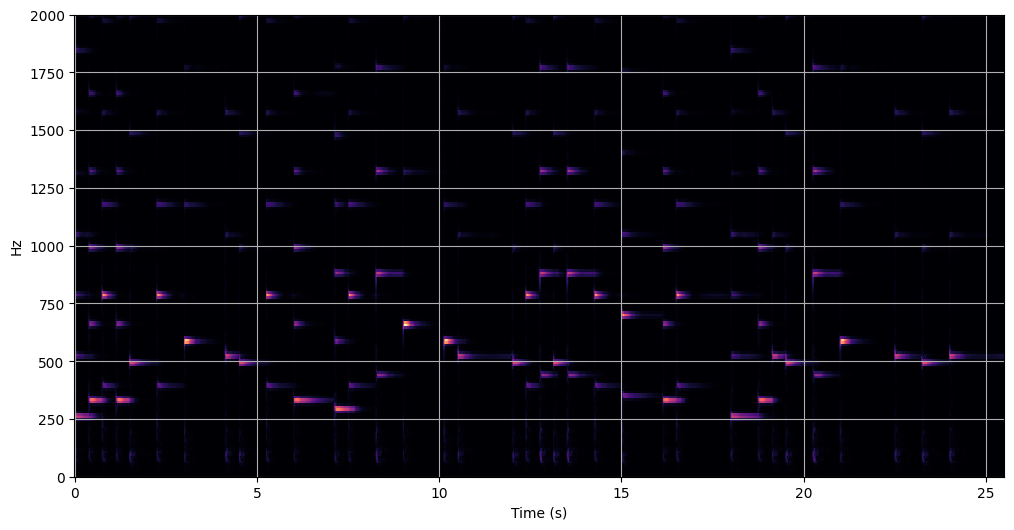

In [29]:
draw_stft(piano, ylim=(0,2000))

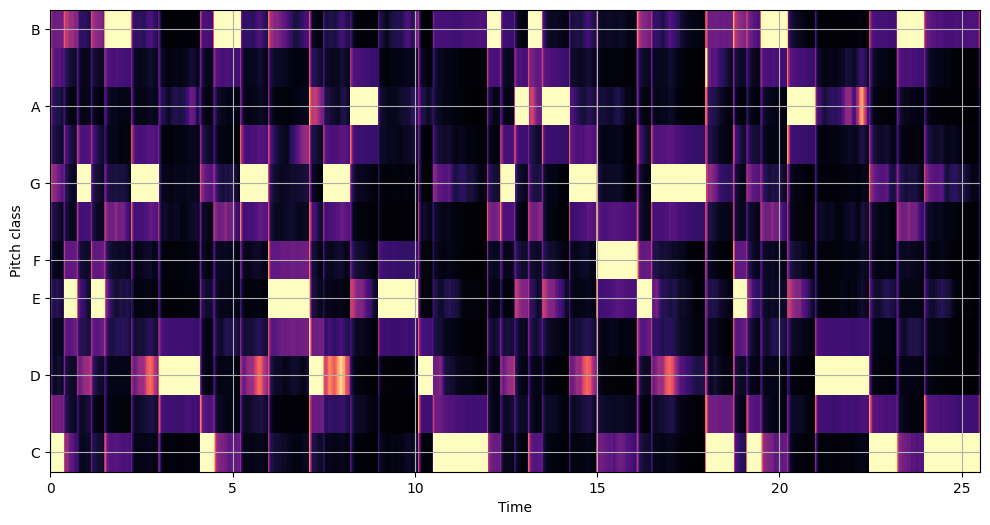

In [30]:
draw_chroma(piano,sr)

In [31]:
flute, sr = librosa.core.load('/home/seungsu/workspace/file/flute.wav')
guitar , sr = librosa.core.load('/home/seungsu/workspace/file/guitar.wav')

In [32]:
IPython.display.Audio(data = flute, rate =sr)

In [33]:
IPython.display.Audio(data = guitar, rate =sr)

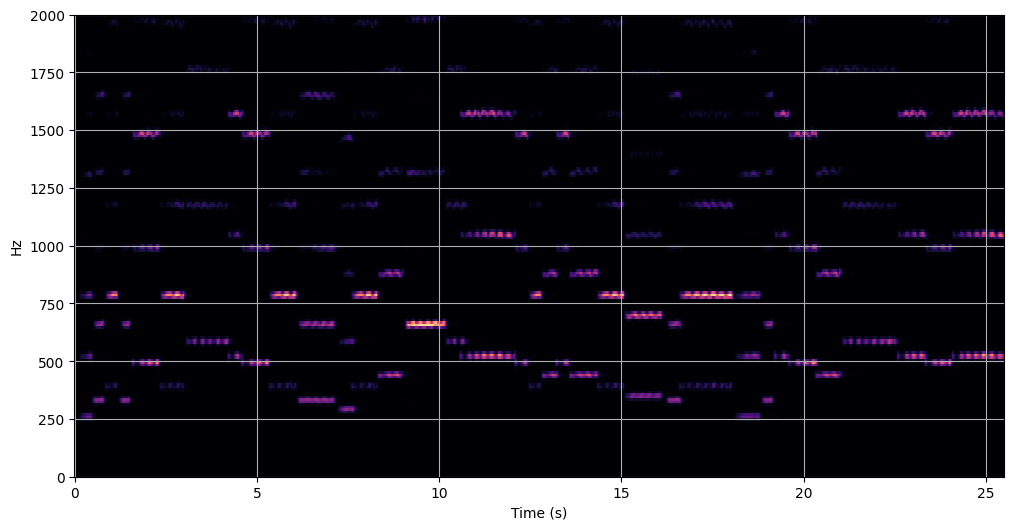

In [34]:
draw_stft(flute, ylim=(0,2000))

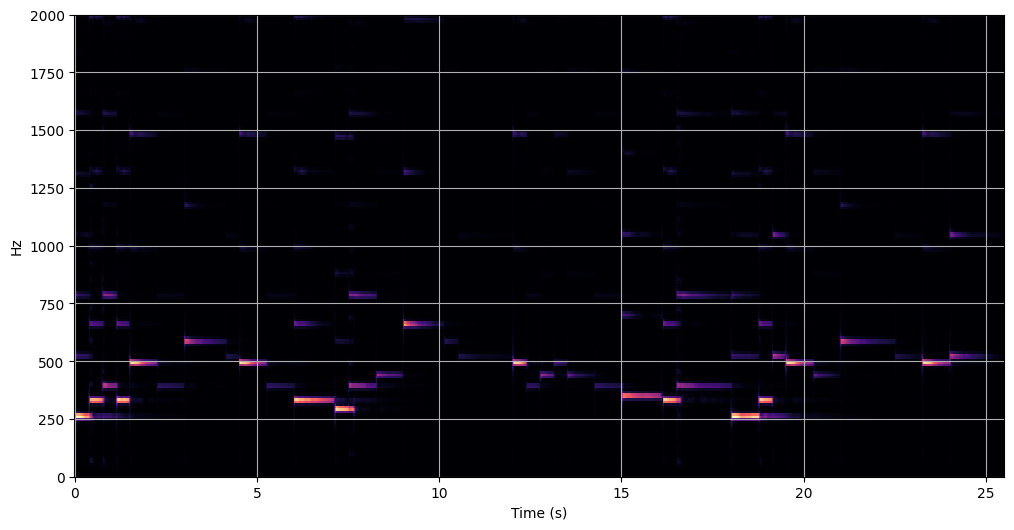

In [35]:
draw_stft(guitar, ylim=(0,2000))

In [36]:
sum_inst = sum([piano*2, guitar, flute * 1.2])

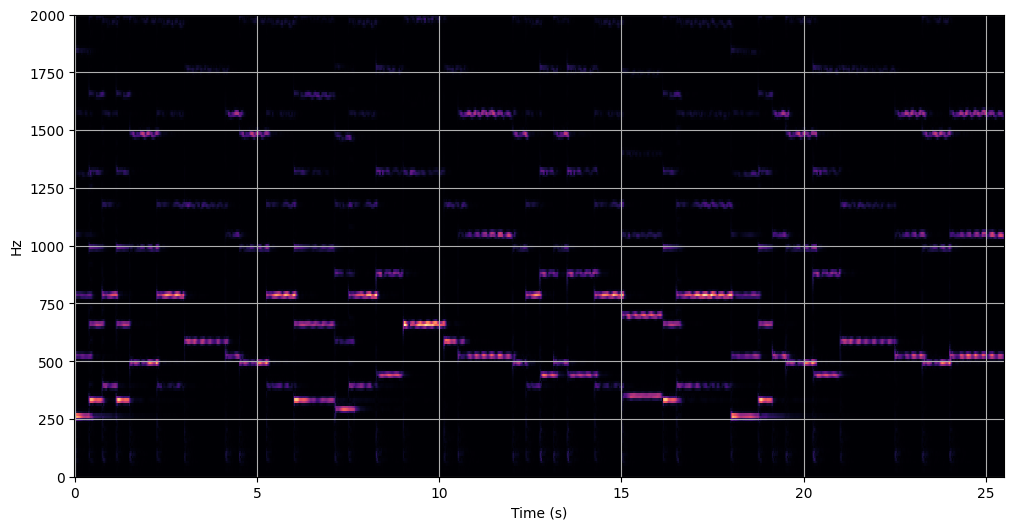

In [38]:
draw_stft(sum_inst, ylim=(0,2000))

In [39]:
IPython.display.Audio(data = sum_inst, rate =sr)

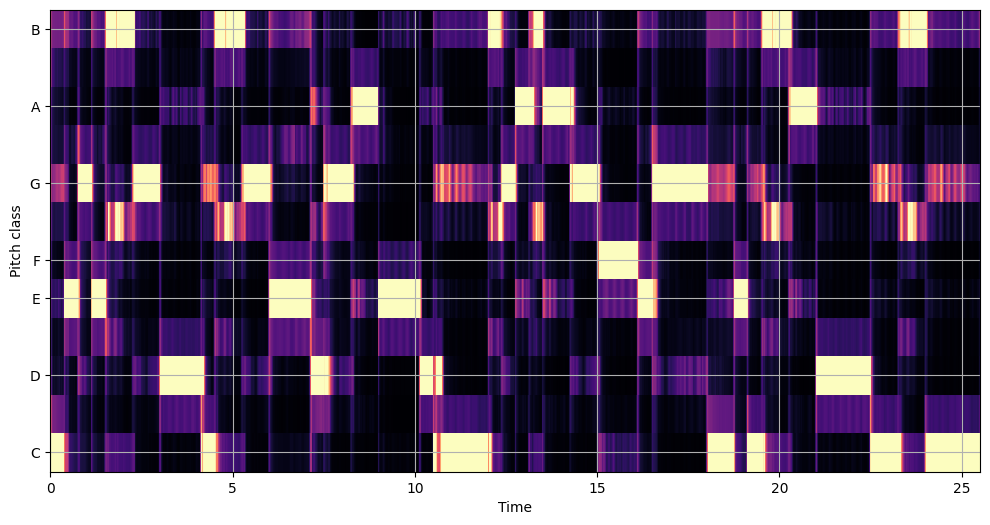

In [40]:
draw_chroma(sum_inst,sr)